Download nursery dataset from UCI. Build a linear regression model by identifying independent 
and target variable. Split the variables into training and testing sets and print them. Build a simple linear 
regression model for predicting purchases.

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv('nursery_dataset.csv')

df = df.rename(columns={'final evaluation': 'final'})

In [11]:
L = len(df.index) 

def print_counts(df):
    for x in df.columns:
        for i, y in zip(df[x].value_counts().index, df[x].value_counts()):
            i = str(i)
            s = f'{i:14}{y/L:4.2f} {y:4d}'
            print(s)
        print('\n')

print_counts(df)

usual         0.33 4320
pretentious   0.33 4320
great_pret    0.33 4320


proper        0.20 2592
less_proper   0.20 2592
improper      0.20 2592
critical      0.20 2592
very_crit     0.20 2592


complete      0.25 3240
completed     0.25 3240
incomplete    0.25 3240
foster        0.25 3240


1             0.25 3240
2             0.25 3240
3             0.25 3240
more          0.25 3240


convenient    0.33 4320
less_conv     0.33 4320
critical      0.33 4320


convenient    0.50 6480
inconv        0.50 6480


nonprob       0.33 4320
slightly_prob 0.33 4320
problematic   0.33 4320


recommended   0.33 4320
priority      0.33 4320
not_recom     0.33 4320


not_recom     0.33 4320
priority      0.33 4266
spec_prior    0.31 4044
very_recom    0.03  328
recommend     0.00    2




In [12]:
for x in df.drop(['health', 'final'], axis=1).columns:
    lst = list(df[x].value_counts().index)
    dic = {k:i+1 for i, k in enumerate(lst)}
    df[x].replace(dic, inplace=True)
    
print_counts(df)

1             0.33 4320
2             0.33 4320
3             0.33 4320


1             0.20 2592
2             0.20 2592
3             0.20 2592
4             0.20 2592
5             0.20 2592


1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


1             0.33 4320
2             0.33 4320
3             0.33 4320


1             0.50 6480
2             0.50 6480


1             0.33 4320
2             0.33 4320
3             0.33 4320


recommended   0.33 4320
priority      0.33 4320
not_recom     0.33 4320


not_recom     0.33 4320
priority      0.33 4266
spec_prior    0.31 4044
very_recom    0.03  328
recommend     0.00    2




In [13]:
dic1 = {'recommended': 2,
        'priority': 3,
        'not_recom': 1}


dic2 = {'not_recom':1,
        'priority':4,
        'spec_prior':5,
        'very_recom':3,
        'recommend':2}

df['health'].replace(dic1, inplace=True)
df['final'].replace(dic2, inplace=True)

print_counts(df)

1             0.33 4320
2             0.33 4320
3             0.33 4320


1             0.20 2592
2             0.20 2592
3             0.20 2592
4             0.20 2592
5             0.20 2592


1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


1             0.33 4320
2             0.33 4320
3             0.33 4320


1             0.50 6480
2             0.50 6480


1             0.33 4320
2             0.33 4320
3             0.33 4320


2             0.33 4320
3             0.33 4320
1             0.33 4320


1             0.33 4320
4             0.33 4266
5             0.31 4044
3             0.03  328
2             0.00    2




In [14]:
ind = (df.loc[:, 'final'] == 2) | (df.loc[:, 'final'] == 3)

df_23 = df[ind].reset_index(drop=True)
df = df[~ind].reset_index(drop=True)

dic3 = {4: 2, 5: 3}


df['final'].replace(dic3, inplace=True)

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [17]:
model = LinearRegression()

model.fit(X_train, y_train)

yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [20]:
print((y_train, yp_train))
                            
                            
                            
                            
                            
                            
                            
                            
                            
    
                            
                            
                            
                            
                            
                            

(7808     1
5669     1
6593     1
11347    3
7701     3
        ..
8824     3
5832     2
12177    3
12609    3
2164     1
Name: final, Length: 8462, dtype: int64, array([1.44846478, 1.0399709 , 1.11603862, ..., 2.55826962, 2.61342593,
       1.13435809]))


In [21]:
X_23, y_23 = df_23.iloc[:,:-1], df_23.iloc[:,-1]


y_pred_23 = model.predict(X_23)

print(y_pred_23)

[1.25672001 1.32138376 1.32294248 1.38760624 1.33048046 1.39514422
 1.39670294 1.4613667  1.40424092 1.46890467 1.47046339 1.53512715
 1.29812796 1.36279172 1.36435044 1.4290142  1.37188842 1.43655218
 1.43811089 1.50277465 1.33953592 1.40419968 1.38094387 1.44560763
 1.28429816 1.34896192 1.35052064 1.41518439 1.35805861 1.42272237
 1.42428109 1.48894485 1.32570612 1.39036987 1.39192859 1.45659235
 1.39946657 1.46413033 1.46568905 1.53035281 1.36711407 1.43177783
 1.40852203 1.47318579 1.31187631 1.37654007 1.37809879 1.44276255
 1.38563677 1.45030053 1.45185924 1.516523   1.35328427 1.41794803
 1.39469222 1.45935598 1.43610018 1.50076394 1.33945447 1.40411822
 1.38086242 1.44552618 1.42227038 1.48693414 1.46367833 1.52834209
 1.39745367 1.46211743 1.46367615 1.5283399  1.47121412 1.53587788
 1.5374366  1.60210036 1.54497458 1.60963834 1.61119705 1.67586081
 1.43886162 1.50352538 1.5050841  1.56974786 1.51262208 1.57728584
 1.57884456 1.64350831 1.48026958 1.54493334 1.52167754 1.5863

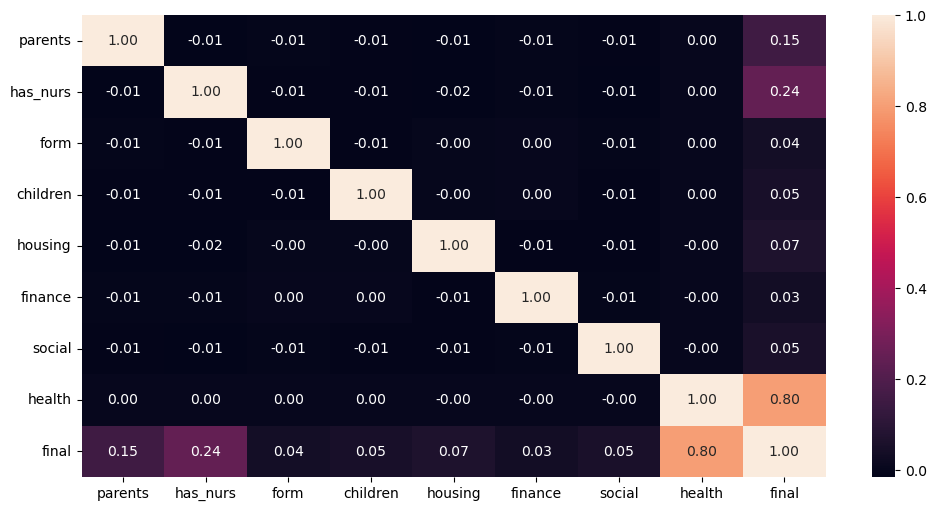

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f');